<a href="https://colab.research.google.com/github/aoudjit/aoudjit/blob/main/ET5003_KaggleCompetition_Aziz_AOUDJIT_20201281_rel_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [ ]:
#@title Current Date
Today = '2021-10-05' #@param {type:"date"}


In [ ]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "Team 3\"" #@param {type:"string"}
Student_ID&Name = "20201281_Aziz AOUDJIT" #@param {type:"string"}
Student_ID&Name = "20201281_Aziz AOUDJIT" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
#@markdown ---

In [ ]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = Final #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [1]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [4]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [6]:
!pip install gpy

     |████████████████████████████████| 959 kB 5.1 MB/s 
     |████████████████████████████████| 71 kB 8.8 MB/s 
  Created wheel for gpy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565106 sha256=1eefc3613cdd8fe0d4a844c3f97268c3c7215c6a68d825ed6804bc24a32bd2f3
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102565 sha256=f7844622d105f5aab4e784f28edc7b1ce07a13513c5497f1e145ab17577778bf
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built gpy paramz


In [7]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [8]:
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
from nltk import sent_tokenize,word_tokenize
from string import punctuation
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import svm
from sklearn.svm import SVC, LinearSVC, LinearSVR
import re
from nltk.stem import WordNetLemmatizer
import nltk
import math
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from nltk.corpus import wordnet
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

In [9]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# Common functions

In [10]:

def distance(coord1, coord2):
    R = 6372800  # Earth radius in meters
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lon2 - lon1)
    
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))/1000

In [302]:
def similarity(listWords):
    result={}
    feat1="Feat1"
    for word1 in listWords:
        for word2 in listWords:
            #print(word1)
            wordFromList1 = wordnet.synsets(word1)
            wordFromList2 = wordnet.synsets(word2)
            if wordFromList1 and wordFromList2: 
                s = wordFromList1[0].wup_similarity(wordFromList2[0])
                #print(s)
                if s != None:
                   if s>0.70 and s!=1.0:
                      if feat1 in result:
                         result[feat1] = result[feat1] + ' ' + word2
                      else:
                         result[feat1] = word2 
    return result

In [344]:
def similarity_word(word,listWords):
    result={}
    feat="Feat_"+word
    for word1 in listWords:
            wordFromList1 = wordnet.synsets(word)
            wordFromList2 = wordnet.synsets(word1)
            if wordFromList1 and wordFromList2: 
                s = wordFromList1[0].wup_similarity(wordFromList2[0])
                #print(s)
                if s != None:
                   if s>=0.70:
                      if feat in result:
                         result[feat] = result[feat] + ' ' + word1
                      else:
                         result[feat] = word1 
    return result

In [39]:
def distanceEncoder(distance):
    try:
        if distance<5 : 
            return "urban"
        if distance<10 :
            return "outurban"
        if distance<20 : 
            return "extraouturban"
        if distance>=20 :
            return "farest"
    except:
        return "farest"

In [335]:
class NlpPipeline():
    
    def __init__(self, data, excluded_words):
        self.data = data 
        self.excluded_words= excluded_words
        self.corpus = {}
        
    def tokenize(self,raw):
        tokens = []
        for sent in sent_tokenize(raw):
            sent=sent.lower()
            sent=sent.replace('-','')
            sub_tokens=word_tokenize(sent)
            for w in sub_tokens:
                tokens.append(''.join(w))
        #print(tokens)
        stopwords_en = set(stopwords.words('english'))
        #words = [word for word in tokens]
        words=[word for word in tokens if word not in stopwords_en ]
        words=[word for word in words if not re.search("^\(|\)$", word)   ]
        words=[word for word in words if  not re.search("[0-9].[0-9]+[m]|[0-9]+[m]", word)]
        words=[word for word in words if  not re.search("^[0-9]+[a-z]*", word)]
        words=[word for word in words if  len(word)>=4]
        #print(words)
        
        stopwords_en_with_punct=stopwords_en.union(set(punctuation))
        words=[word for word in words if word not in stopwords_en_with_punct ]
        words=[word for word in words if word not in self.excluded_words ]
        
        return words
    
    def stem(self,tokens):
        stopwords_en = set(stopwords.words('english'))
        stemmer=PorterStemmer()
        stemmize_words=[]
        for word in tokens:
            stem = stemmer.stem(word)
            if stem not in stopwords_en and  stem not in self.excluded_words and len(stem)>=4:
                stemmize_words.append(stem)
        return stemmize_words
        
    def lemmatize(self,tokens):
        lemmatize_words=[]
        lemmatizer=WordNetLemmatizer()
        for word in tokens:
            if word not in self.excluded_words:
                lemmatize_words.append(lemmatizer.lemmatize(word))
        return lemmatize_words
    
    def PosTag(self,tokens):
        tagged_words=nltk.pos_tag(tokens)
        return tagged_words

        
    def ner(self,tagged_words):
        chunk_words=nltk.ne_chunk(tagged_words, binary=True)
        entity_names=[]
        for tree in chunk_words.subtrees():
            #print(tree)
            entity_names.extend(self.extract_entity(tree))
        #print(entity_names)
        return entity_names
    
    def extract_entity(self,t):
        entity_names=[]
        if hasattr(t,'label') and t.label():
            if t.label()=='S':
            
               for child in t:
                   # if child[1]=='JJS' or child[1]=='JJR' or child[1]=='JJ' or child[1]=='NN':
                        entity_names.append(''.join(child[0]))
                   # else:
                      #  for child in t:
                          #  entity_names.extend(self.extract_entity(child))
            else:
                for child in t:
                    entity_names.extend(extract_entity(child))
        return entity_names
    
    def build(self):
        models = []
        full_tokens=[]
        data=self.data.values.reshape(-1,1)
        #print(self.data.shape)
        for i in range(data.shape[0]):
            sent=data[i]
            tokens=self.tokenize(sent[0])
            
            #tokens=self.stem(tokens)
            
            tokens=self.lemmatize(tokens)
           # tokens= ' '.join(dict.fromkeys(str(tokens).split()))

            tagged_words=self.PosTag(tokens)
            #print(tagged_words)
            entities = self.ner(tagged_words)
            model = ''
            for token in entities:
                model = model + ' ' + token
                if  token in self.corpus:
                   self.corpus[token] = self.corpus[token] + 1
                else: 
                   self.corpus[token] = 1
            
            models.append(model)

            
        return models

In [14]:
def outliners(feature):
    fig = plt.figure(figsize=(10,4))

    ax = fig.add_subplot(1, 2, 1)
    ax.set_title("Boxplot of " + feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('Number of Applicants')
    dftrain.boxplot(column=[feature])

    plt.show()

In [15]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

In [16]:
def plot(Ypred,ylog):

# plot prediction shape
  for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
  az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

# true observations
  az.plot_dist(ylog,label='true observations');
  plt.legend()
  plt.xlabel("log(y) - output variable")
  plt.ylabel("density plot");

In [202]:
def clusters(Xf_train,Xf_test,yf_train,cluster_number):
  Xn = Xf_train[clusters_train==cluster_number,:]
  Xtestn = Xf_test[clusters_test==cluster_number,:]

  ylog = np.log(yf_train.astype('float')[clusters_train==cluster_number,:])
  yscaller = StandardScaler().fit(ylog)
  yn = yscaller.transform(ylog) 
  return Xn,yn,yscaller,ylog,Xtestn  

In [18]:
def predict_posterior(Xn,yn,yscaller,nsamples):

  with pm.Model() as model:
  # prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn.shape[1])
  # prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn.T)
  # likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn[:,0])
    approximation = pm.fit(60000,method='advi')

# samples from the posterior  
    posterior = approximation.sample(2500,include_transformed=True)
    Ypred = yscaller.inverse_transform(ppc(posterior['alpha'],posterior['beta'],posterior['sigma_n'],Xn,  nsamples=nsamples))
    return Ypred,posterior

In [19]:
def print_performance(X_test,y_test,scaller,posterior,num_cluster): 
   y_pred_BLR = np.exp(scaller.inverse_transform(np.mean(posterior['alpha']) 
              + np.dot(np.mean(posterior['beta'],axis=0), X_test.T)))
   print("Size Cluster",num_cluster,":", np.sum(clusters_test==num_cluster), ", MAE Cluster",num_cluster,":",
      (np.mean(abs(y_pred_BLR - y_test[clusters_test==num_cluster]))))
   print("MAPE Cluster",num_cluster,":",(np.mean(abs(y_pred_BLR - y_test[clusters_test==num_cluster]) /y_test[clusters_test==num_cluster])))
   #print(y_pred_BLR.shape,":",np.array(y_test[clusters_test==num_cluster]).shape)
   return y_pred_BLR

In [20]:
def calculate_mean_square_error(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.sqrt(np.mean(np.square((actual - pred) / actual))) * 100

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

## Training & Test Data

### Train dataset

In [21]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [100]:
path = '/content/drive/MyDrive/university/modules/ET5003/house-price/'
# training dataset: 
training_file = 'HousePrice_Train.csv'
dftrain=pd.read_csv(path+training_file)
# test dataset: 
testing_file = 'HousePrice_Test.csv'
dftest=pd.read_csv(path+testing_file)

In [23]:
dftrain = dftrain.dropna()

In [24]:
dftrain.isna().sum()

Index            0
ID               0
Location         0
Num_Bathrooms    0
Num_Beds         0
BER_class        0
Description      0
Services         0
Features         0
Latitude         0
Longitude        0
Type             0
Surface          0
Price            0
dtype: int64

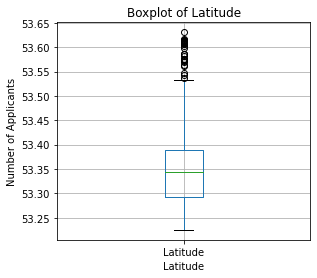

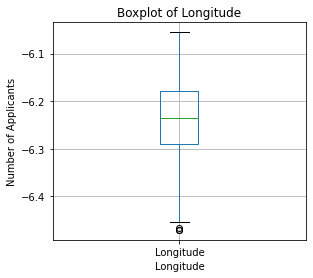

In [27]:
outliners('Latitude',df_subset_train)
outliners('Longitude',df_subset_train)

In [101]:
dftrain=dftrain[dftrain.Num_Bathrooms!=0]
dftrain=dftrain[dftrain.Num_Beds!=0]
dftrain=dftrain[dftrain.Num_Bathrooms<=10]
dftrain=dftrain[dftrain.Num_Beds<=10]
dftrain=dftrain[dftrain.Longitude<=-6]
dftrain=dftrain[dftrain.Latitude>53]

In [102]:
# select some features columns just for the baseline model
# assume not all of the features are informative or useful
# in this exercise you could try all of them if possible

featrain = ['Latitude','Longitude','Num_Bathrooms','Num_Beds','Price']
# dropna: remove missing values
df_subset_train = dftrain[featrain].dropna(axis=0)

# this will be used for performance testing of the model, 
featest = ['Latitude','Longitude','Num_Bathrooms','Num_Beds']
df_subset_test  =  dftest[featest].dropna(axis=0)



In [103]:
# train set, input columns
Xs_train = df_subset_train.iloc[:,0:-1].values 
#Xs_train = X_train
# train set, output column, cost
ys_train = df_subset_train.iloc[:,-1].values.reshape(-1,1)   
#ys_train = y_train
# test set, input columns
Xs_test = df_subset_test.iloc[:,0:].values 

In [277]:
print(X_train.shape)

(341, 4)


In [104]:
# split data into training and test
from sklearn.model_selection import train_test_split

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
X_train,X_val,y_train,y_val = train_test_split(Xs_train, ys_train, test_size=0.3)

In [105]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([X_train,X_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_val = np.hstack([X_val,X_val[:,[2]]**2])
Xn_val = xscaler.transform(Xss_val)

Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xss_test)

ylog = np.log(y_train.astype('float').reshape(-1,1))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)
ylog_val = np.log(y_val.astype('float').reshape(-1,1))
yscaler_val = StandardScaler().fit(ylog_val)
yn_val = yscaler_val.transform(ylog_val)

In [ ]:
# show first data frame rows 
dftrain.head()

In [ ]:
# Generate descriptive statistics
dftrain.describe()

### Test dataset

In [ ]:
# show first data frame rows 
dftest.head()

In [ ]:
# Generate descriptive statistics
dftest.describe()

### Expected Cost dataset

In [ ]:
# Generate descriptive statistics
dfcost.describe()

In [34]:
dftrain.isna().sum()

Index              0
ID                 0
Location           0
Num_Bathrooms      0
Num_Beds           0
BER_class          0
Description        0
Services           0
Features           0
Latitude           0
Longitude          0
Type               0
Surface            0
Price              0
Distances        361
Distance         361
dtype: int64

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

Your comments, explanation, and references here.

In [132]:
coordinates = [dftrain.Latitude,dftrain.Longitude]
coordinates = pd.DataFrame(np.array(coordinates).T).add_prefix('C')
distances=np.ones(dftrain.Latitude.shape)
dublin_coordinate =[53.3498053,-6.2603097]
for i in range(coordinates.C0.shape[0]) :
    coord=[coordinates.C0[i], coordinates.C1[i]]
    d = distance(dublin_coordinate, np.array(coord))
    distances[i]=d

dftrain["Distances"] = pd.DataFrame(np.array(distances))    
dftrain["Distance"] = dftrain["Distances"].apply(distanceEncoder)


In [107]:
for i in range(dftrain.Description.values.shape[0]):
    dftrain.Description.values[i]=' '.join(dict.fromkeys(dftrain.Description.values[i].split()))
    #print (dftrain.Description.values[i])
#dftrain.Description.values = dftrain.Description.values' '.join(dict.fromkeys(string.split())))

In [136]:
dftrain['BER_class_'] = dftrain.BER_class
dftrain['BER_class_'] = dftrain.BER_class_.replace({'A1':'excelentenergy','A2':'excelentenergy','A3':'excelentenergy'})
dftrain['BER_class_'] = dftrain.BER_class_.replace({'B1':'goodenergy','B2':'goodenergy','B3':'goodenergy'})
dftrain['BER_class_'] = dftrain.BER_class_.replace({'C1':'midiumenergy','C2':'midiumenergy','C3':'midiumenergy'})
dftrain['BER_class_'] = dftrain.BER_class_.replace({'D1':'lowenergy','D2':'lowenergy','D3':'lowenergy'})
dftrain['BER_class_'] = dftrain.BER_class_.replace({'E1':'lowerenergy','E2':'lowerenergy','E3':'lowerenergy'})
dftrain['BER_class_'] = dftrain.BER_class_.replace({'F':'badenergy','G':'badenergy','SINo666of2006exempt':'badenergy',np.nan:'badenergy'})
dftrain['Num_Beds_'] = dftrain['Num_Beds']
dftrain['Num_Beds_'] = dftrain.Num_Beds_.replace({1:'verysmall',2:'midiumsmall',3:'midiumhouse',4:'largehouse'})
dftrain['Num_Beds_'] = dftrain.Num_Beds_.replace({5:'extralarge',6:'extralarge',7:'extralarge',8:'extralarge'})
dftrain['Num_Beds_'] = dftrain.Num_Beds_.replace({9:'extralarge',15:'extralarge',27:'extralarge'})


In [143]:
dftrain["Description2"] = dftrain.Description.str.cat(dftrain.Num_Beds_, sep=" ").str.cat(dftrain.BER_class_, sep=" ")#.str.cat(dftrain.Distance, sep=" ")
#dftrain["Description2"] = dftrain.Num_Beds.str.cat(dftrain.BER_class, sep=" ").str.cat(dftrain.Distance, sep=" ")
dftrain["Description2"] = dftrain["Description2"].str.cat(dftrain.Type, sep=" ")

In [290]:
import nltk
#nltk.download('all')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [144]:
y=dftrain.Price
X=dftrain
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [219]:
ylog_train = np.log(np.array(y_train).astype('float').reshape(-1,1))
yscaler_train = StandardScaler().fit(ylog_train)
yn_train = yscaler_train.transform(ylog_train)

In [336]:
excluded_words=['living','bedroom','kitchen','room','bathroom','accommod',' entranc','hall','excel','delight','offer','purchas','includ','sale','agent','minut','owner','highli','four','approx','proport','point','back','rear','club']
nlp = NlpPipeline (X_train.Description,excluded_words)
data = nlp.build()
data_df = pd.DataFrame(np.array(data)).add_prefix('C')



In [369]:
sorted_corpus = sorted(nlp.corpus.items(), key=lambda x:x[1],reverse=True)
sortdict = dict(sorted_corpus)
#print(sortdict)
#print (data)

In [338]:
corpus = {}
for k,v in nlp.corpus.items():

   if v > 100:

     corpus[k]=v




## Features creation

In [370]:
#print(corpus)
#print(list(corpus.keys()))
print(similarity_word("education",list(corpus.keys())))
print(similarity_word("sport",list(corpus.keys())))
print(similarity_word("shops",list(corpus.keys())))
print(similarity_word("entertainment",list(corpus.keys())))
print(similarity_word("transportation",list(corpus.keys())))

{'Feat_education': 'market offer looking service washing boast storage drive study selection sport tennis planning golf'}
{'Feat_sport': 'market looking service washing sport tennis planning golf'}
{'Feat_shops': 'shop office porch balcony store'}
{'Feat_entertainment': 'market looking service washing sport tennis planning golf'}
{'Feat_transportation': 'panel well road original porch laminate timber station transport airport balcony facility leading brick system'}


### test without new features

In [148]:
from scipy.sparse import coo_matrix, hstack
print(data_df.shape)
basicvectorizer = CountVectorizer(ngram_range=(1,1),max_features=1000)
basictrain = basicvectorizer.fit_transform(data_df.C0)
#print(np.array(basictrain))
basictrain_full = hstack([coo_matrix(basictrain),np.array(X_train.Latitude).reshape(-1,1), np.array(X_train.Longitude).reshape(-1,1)])
print(basictrain_full.shape)

(1143, 1)
(1143, 1002)


In [149]:
basicmodel = svm.LinearSVC(C=0.1, class_weight='balanced', multi_class='ovr')
basicmodel = basicmodel.fit(basictrain_full, y_train)
#basictrain = basicvectorizer.transform(data_df.C0)
predictions_train = basicmodel.predict(basictrain_full)
print ('rmspe:',calculate_mean_square_error(np.array(y_train), np.array(predictions_train)),'%')
print ('score r2:',r2_score(y_train, predictions_train)*100, '%')

rmspe: 0.0 %
score r2: 100.0 %


In [150]:
nlp2 = NlpPipeline (X_test.Description2,excluded_words)
data2 = nlp2.build()
data_df2 = pd.DataFrame(np.array(data2)).add_prefix('C')

print(data_df2.shape)
print(X_test.Description2.shape)

(491, 1)
(491,)


In [151]:

basictest = basicvectorizer.transform(data_df2.C0)
basictest_full = hstack([coo_matrix(basictest),np.array(X_test.Latitude).reshape(-1,1), np.array(X_test.Longitude).reshape(-1,1)])
predictions = basicmodel.predict(basictest_full)

In [152]:
from sklearn.metrics import r2_score
#print(np.array(predictions))
#print (accuracy_score(y_test, predictions))
print ('rmspe:',calculate_mean_square_error(np.array(y_test), np.array(predictions)),'%')
#print(np.array([y_test,predictions]).T)
print (r2_score(y_test, predictions))
print("MAE = ",(np.mean(abs(predictions - y_test))))
print("MAPE = ",(np.mean(abs(predictions - y_test) / y_test)))

rmspe: 46.69461805106408 %
0.1613689183908894
MAE =  215830.7535641548
MAPE =  0.3361562131599493


In [ ]:
def get_classification_metric(testy, probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(testy, probs[:,1])
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    return fscore[ix]

In [153]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import ExtraTreeRegressor
extra_tree = ExtraTreeRegressor(random_state=0)
reg = AdaBoostRegressor(extra_tree,n_estimators=200, random_state=0, learning_rate=0.8).fit(basictrain_full.toarray(), y_train)
pred_b = reg.predict(basictrain_full.toarray())
print (r2_score(y_train, pred_b))

0.9982974613489558


In [154]:
pred_t = reg.predict(basictest_full.toarray())
print (r2_score(y_test, pred_t))
print("MAE = ",(np.mean(abs(pred_t - y_test))))
print("MAPE = ",(np.mean(abs(pred_t - y_test) / y_test)))

0.5109518875132915
MAE =  146735.53971486763
MAPE =  0.22243454047576924


### test with new features

#### to complete ......

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

Your comments, explanation, and references here.

In [351]:
X_train,X_val,y_train,y_val = train_test_split(Xs_train, ys_train, test_size=0.3)

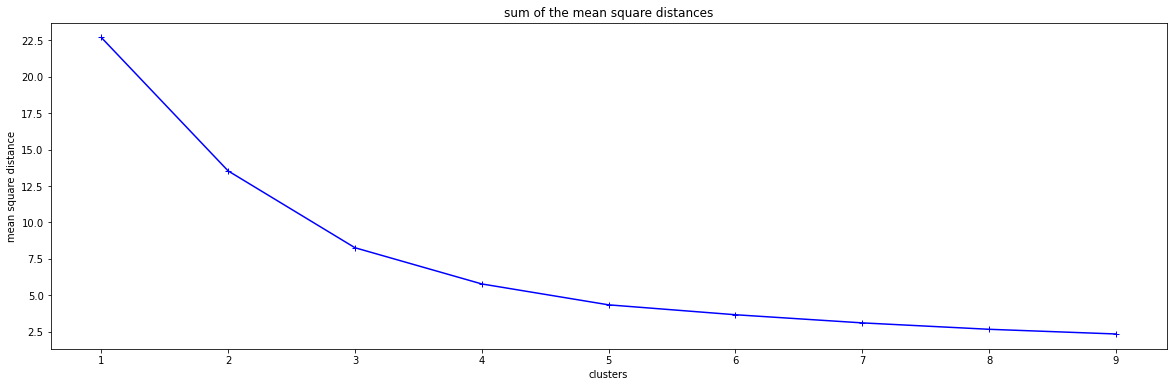

In [352]:
from sklearn.cluster import KMeans
ind=[0,1]
X_ind = np.vstack([np.array(X_train)[:,ind],np.array(X_val)[:,ind]])
inertia = []
indexes = []
for cls in range(1, 10):
    kmeans = KMeans(init='random', n_clusters=cls, max_iter=500).fit(np.array(X_ind))
    inertia.append( kmeans.inertia_)
    indexes.append( cls)


plt.figure(figsize=(20, 6))
plt.plot(indexes, inertia, 'b+-')
plt.xlabel("clusters")
plt.ylabel("mean square distance")

plt.title("sum of the mean square distances")
plt.show()

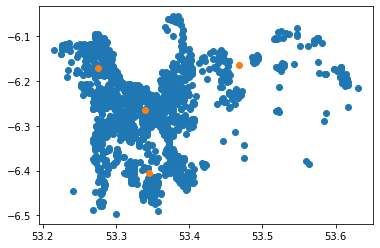

In [353]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
dftrain.head()
gmm = GaussianMixture(n_components=4)

# Gaussian Mixture
gmm.fit(X_ind)
# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1])
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])

In [354]:
# train clusters
clusters_train = gmm.predict(np.array(X_train)[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))

{0: 199, 1: 183, 2: 189, 3: 572}

In [355]:
# test clusters
clusters_test = gmm.predict(np.array(X_val)[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))


{0: 89, 1: 71, 2: 77, 3: 254}

In [357]:
Xn0,yn0,yscaller0,ylog0,Xtestn0=clusters(np.array(X_train),np.array(X_val),np.array(y_train),0)
Ypred0,posterior0=predict_posterior(Xn0,yn0,yscaller0,200)
Xn1,yn1,yscaller1,ylog1,Xtestn1=clusters(np.array(X_train),np.array(X_val),np.array(y_train),1)
Ypred1,posterior1=predict_posterior(Xn1,yn1,yscaller1,200)
Xn2,yn2,yscaller2,ylog2,Xtestn2=clusters(np.array(X_train),np.array(X_val),np.array(y_train),2)
Ypred2,posterior2=predict_posterior(Xn2,yn2,yscaller2,200)
Xn3,yn3,yscaller3,ylog3,Xtestn3=clusters(np.array(X_train),np.array(X_val),np.array(y_train),3)
Ypred3,posterior3=predict_posterior(Xn3,yn3,yscaller3,200)
#Xn4,yn4,yscaller4,ylog4,Xtestn4=clusters(X_train,X_val,y_train,4)
#Ypred4,posterior4=predict_posterior(Xn4,yn4,yscaller4,200)

Finished [100%]: Average Loss = 238.68


Finished [100%]: Average Loss = 242.31


Finished [100%]: Average Loss = 194.19


Finished [100%]: Average Loss = 665.51


In [358]:
   print("Size Cluster",0,":", np.sum(clusters_train==0), ", MAE Cluster",0,":",(np.mean(abs(np.mean(Ypred0) - yn_train[clusters_train==0]))))
   print("MAPE Cluster",0,":",(np.mean(np.abs(np.mean(Ypred0[:1]) - yn_train[clusters_train==0]) /yn_train[clusters_train==0])))
   print("Size Cluster",1,":", np.sum(clusters_train==1), ", MAE Cluster",1,":",(np.mean(abs(np.mean(Ypred1) - yn_train[clusters_train==1]))))
   print("MAPE Cluster",1,":",(np.mean(abs(np.mean(Ypred1) - yn_train[clusters_train==1]) /yn_train[clusters_train==1])))

Size Cluster 0 : 199 , MAE Cluster 0 : 12.667540122933124
MAPE Cluster 0 : -176.6563541350273
Size Cluster 1 : 183 , MAE Cluster 1 : 12.827449754717255
MAPE Cluster 1 : -90.84941614586918


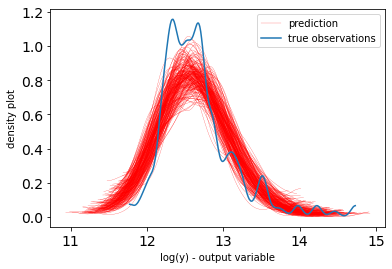

In [359]:
plot(Ypred0,ylog0)

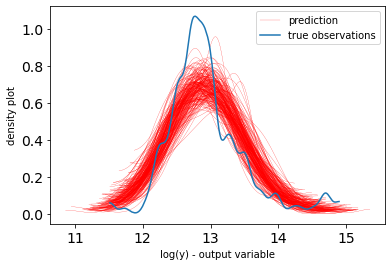

In [360]:
plot(Ypred1,ylog1)

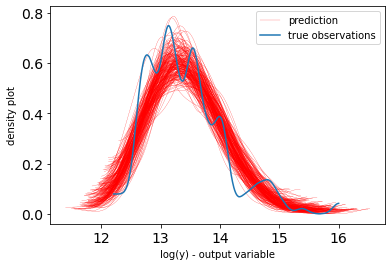

In [361]:
plot(Ypred2,ylog2)

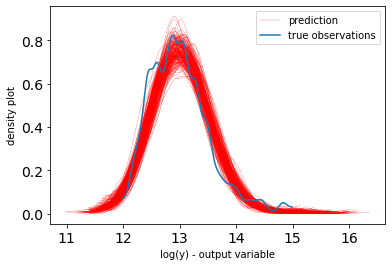

In [362]:
plot(Ypred3,ylog3)

In [213]:
#plot(Ypred4,ylog4)

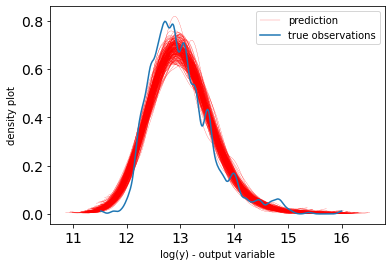

In [363]:
# simulation
Ypred = np.hstack([ Ypred0,Ypred1,Ypred2,Ypred3])
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3])

plot(Ypred,ylog)

In [365]:
y_pred_BLR0=print_performance(Xtestn0,y_val,yscaller0,posterior0,0)
y_pred_BLR1=print_performance(Xtestn1,y_val,yscaller1,posterior1,1)
y_pred_BLR2=print_performance(Xtestn2,y_val,yscaller2,posterior2,2)
y_pred_BLR3=print_performance(Xtestn3,y_val,yscaller3,posterior3,3)
#y_pred_BLR4=print_performance(Xtestn4,y_val,yscaller4,posterior4,4)
#print(y_pred_BLR0,":",np.array(y_val[clusters_test==0]).reshape(-1))
# joint
joint=np.hstack([abs(y_pred_BLR0 - y_val[clusters_test==0].reshape(-1)),
                 abs(y_pred_BLR1 - y_val[clusters_test==1].reshape(-1)),
                 abs(y_pred_BLR2 - y_val[clusters_test==2].reshape(-1)),
                 abs(y_pred_BLR3 - y_val[clusters_test==3].reshape(-1))])
joint_mape = np.mean(np.hstack([
                        abs(y_pred_BLR0 - y_val[clusters_test==0].reshape(-1)) /y_val[clusters_test==0].reshape(-1),
                        abs(y_pred_BLR1 - y_val[clusters_test==1].reshape(-1)) /y_val[clusters_test==1].reshape(-1),
                        abs(y_pred_BLR2 - y_val[clusters_test==2].reshape(-1)) /y_val[clusters_test==2].reshape(-1),
                        abs(y_pred_BLR3 - y_val[clusters_test==3].reshape(-1)) /y_val[clusters_test==3].reshape(-1)
                        
                       ]))

# MAE band MAPE
print("Overall MAE=",np.mean(joint),"Overall MAPE=",joint_mape)

Size Cluster 0 : 89 , MAE Cluster 0 : 187277.67610376087
MAPE Cluster 0 : 0.4427915843563315
Size Cluster 1 : 71 , MAE Cluster 1 : 314148.9702263916
MAPE Cluster 1 : 0.6902219260609793
Size Cluster 2 : 77 , MAE Cluster 2 : 556070.21978893
MAPE Cluster 2 : 0.7247359299728136
Size Cluster 3 : 254 , MAE Cluster 3 : 303140.7893879753
MAPE Cluster 3 : 0.6324088453056083
Overall MAE= 203666.77263456912 Overall MAPE= 0.31534882714060347


PPC on the Test set

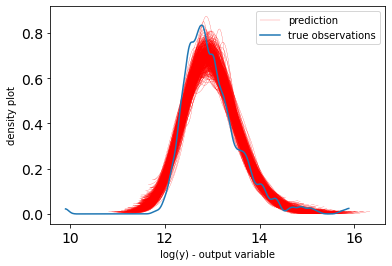

In [368]:
num_samples2 = 500
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xtestn0, nsamples=num_samples2)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xtestn1, nsamples=num_samples2)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xtestn2, nsamples=num_samples2)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xtestn3, nsamples=num_samples2)


# Stack arrays in sequence horizontally (column wise)
Ypred = np.hstack([yscaller0.inverse_transform(Ypred0),
                 yscaller1.inverse_transform(Ypred1),
                 yscaller2.inverse_transform(Ypred2),
                 yscaller3.inverse_transform(Ypred3),
                 ])

# plot prediction shape
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
# true observations
az.plot_dist(np.log(y_val),label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [253]:
print(Xn_train.shape,':',yn_train.shape)

(341, 5) : (341, 1)


In [323]:
# https://theano-pymc.readthedocs.io/en/latest/
import theano

# add a column of ones to include an intercept in the model
x1 = np.hstack([np.ones((X_train.shape[0],1)), X_train])
print(x1.shape)
floatX = theano.config.floatX

l = 15
# Initialize random weights between each layer
# we do that to help the numerical algorithm that computes the posterior
init_1 = np.random.randn(x1.shape[1], l).astype(floatX)
init_out = np.random.randn(l).astype(floatX)

# pymc3 model as neural_network
with pm.Model() as neural_network:
    # we convert the data in theano type so we can do dot products with the correct type.
    ann_input = pm.Data('ann_input', x1)
    ann_output = pm.Data('ann_output', yn_train.T)
    # Priors 
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_1', 0, sigma=10,
                             shape=(x1.shape[1], l), testval=init_1)
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_0', 0, sigma=10,
                              shape=(l,),testval=init_out)

    # Build neural-network using tanh activation function
    # Inner layer
    act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
    # Linear layer, like in Linear regression
    act_out = pm.Deterministic('act_out',pm.math.dot(act_1, weights_2_out))

    # standard deviation of noise
    sigma = pm.HalfCauchy('sigma',5)

    # Normal likelihood
    out = pm.Normal('out',
                       act_out,
                       sigma=sigma,
                       observed=ann_output)

(341, 5)


In [1]:
# this can be slow because there are many parameters

# some parameters
par1 = 500  # start with 100, then use 1000+
par2 = 1500 # start with 1000, then use 10000+

# neural network
with neural_network:
    posterior = pm.sample(par1,tune=par2,chains=1)

NameError: ignored

In [325]:
# we can do instead an approximated inference
param3 = 1000 # start with 1000, then use 50000+
VI = 'fullrank_advi'  # 'advi', 'fullrank_advi', 'svgd', 'asvgd', 'nfvi'
OP = pm.adam # pm.adam, pm.sgd, pm.adagrad, pm.adagrad_window, pm.adadelta
LR = 0.01   

with neural_network:
    approx = pm.fit(param3, method=VI, obj_optimizer=pm.adam(learning_rate=LR))

Finished [100%]: Average Loss = 1,274.3


In [329]:
# draw samples from variational posterior
D = 600
posterior = approx.sample(draws=D)

In [330]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((X_train.shape[0],1)), X_train])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred)
y_pred = np.array(y_pred).mean(axis=0)
y_pred_ = np.exp(yscaler.inverse_transform(y_pred))

In [331]:
print(y_pred_.shape,':',y_train.shape)
print("MAE = ",(np.mean(abs(y_pred_ - y_train))))
print("MAPE = ",(np.mean(abs(y_pred_ - y_train) / y_train)))

(341,) : (341, 1)
MAE =  194255.1426005505
MAPE =  0.34776706238764665


In [332]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((X_val.shape[0],1)), X_val])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred)
y_pred = np.array(y_pred).mean(axis=0)
y_pred_ = np.exp(yscaler_val.inverse_transform(y_pred))

In [333]:

print(y_pred_.shape,':',y_val.shape)
print("MAE = ",(np.mean(abs(y_pred_ - y_val))))
print("MAPE = ",(np.mean(abs(y_pred_ - y_val) / y_val)))

(147,) : (147, 1)
MAE =  205049.89688192986
MAPE =  0.35805216782604365


In [275]:
# add a column of ones to include an intercept in the model
test_set = np.hstack([np.ones((Xs_test.shape[0],1)), Xs_test])

y_pred_test = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,test_set.T))
    #outer layer
    y_pred_test.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred_test = np.array(y_pred_test)
y_pred_test = np.array(y_pred_test).mean(axis=0)
y_pred_test_ = np.exp(yscaler.inverse_transform(y_pred_test))
print(y_pred_test_)

[331533.49096341 328169.95971733 332997.44054685 329347.4569247
 330096.3449421  332983.91939543 332988.79763294 331533.48288624
 328777.22511995 328208.60517925 331580.33930897 329931.98389385
 331447.15705854 329990.75359125 330085.16607743 332982.71361169
 329986.77032927 331442.38853425 331542.87961121 330098.30283009
 328603.07478811 331461.93077233 335892.57796613 328849.24995962
 328697.00023792 335914.80685443 327889.88862991 332983.89094023
 331538.4199058  335909.3708068  328531.43110844 329376.52990626
 329735.19615174 328859.98401667 335932.51427679 328846.37633022
 331540.05357718 332992.34179213 336015.27298394 331652.19310039
 330317.97221582 330308.76499035 332982.40049557 331639.57497451
 328522.5113306  332981.94972943 331698.48293932 330053.94009175
 330318.7203471  328122.429297   329718.78080375 332993.69052233
 332990.63272118 329610.7464489  328852.05622253 332984.30273491
 331666.67719959 331647.18973084 328818.72171905 331447.59897842
 329391.61682248 329297.76

# SUMMARY

Your summary here.